<a href="https://colab.research.google.com/github/decorum16/hello-world-/blob/master/SALABIU_ABIMBOLA_NEURAL_NETWORK_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# SALABIU JAMIU ABIMBOLA - NEURAL NETWORK PROJECT 

Project Description - Bank Churn Prediction
 

Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 79kB/s 
     |████████████████████████████████| 450kB 50.8MB/s 
     |████████████████████████████████| 3.8MB 49.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=8b3bab2dad8f7b4295ed8b7409813fbfbf56a5c36a72be32bdd11a4e6a9dc73e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstal

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [ ]:

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')


In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.nunique()  # To check number of unique values in a particular column

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

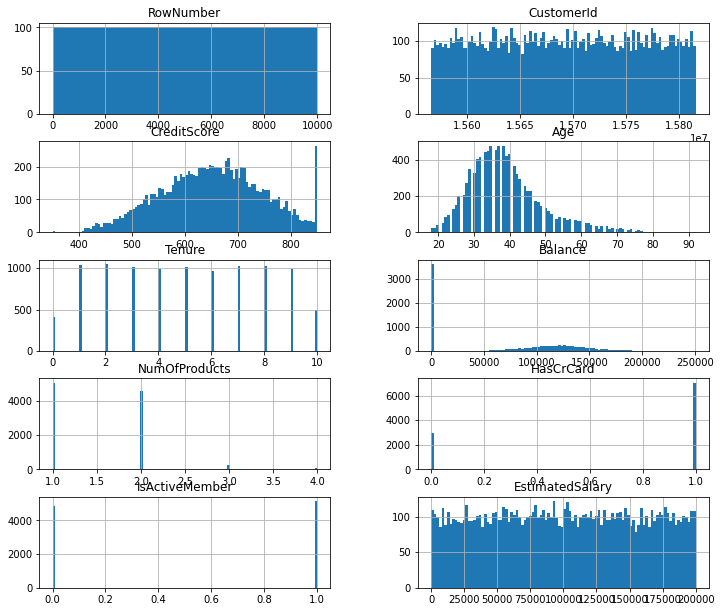

In [ ]:
columns = list(data)[0:-1] 
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 14 columns

In [ ]:
data.corr() # It will show correlation matrix of every possible variables  

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

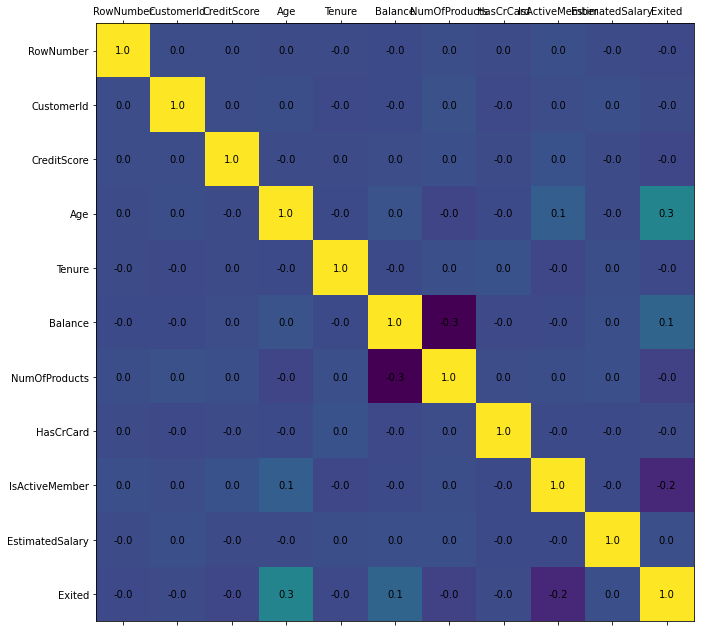

In [ ]:
plot_corr(data)

UNIVARIATE AND BIVARIATE ANALYSIS 

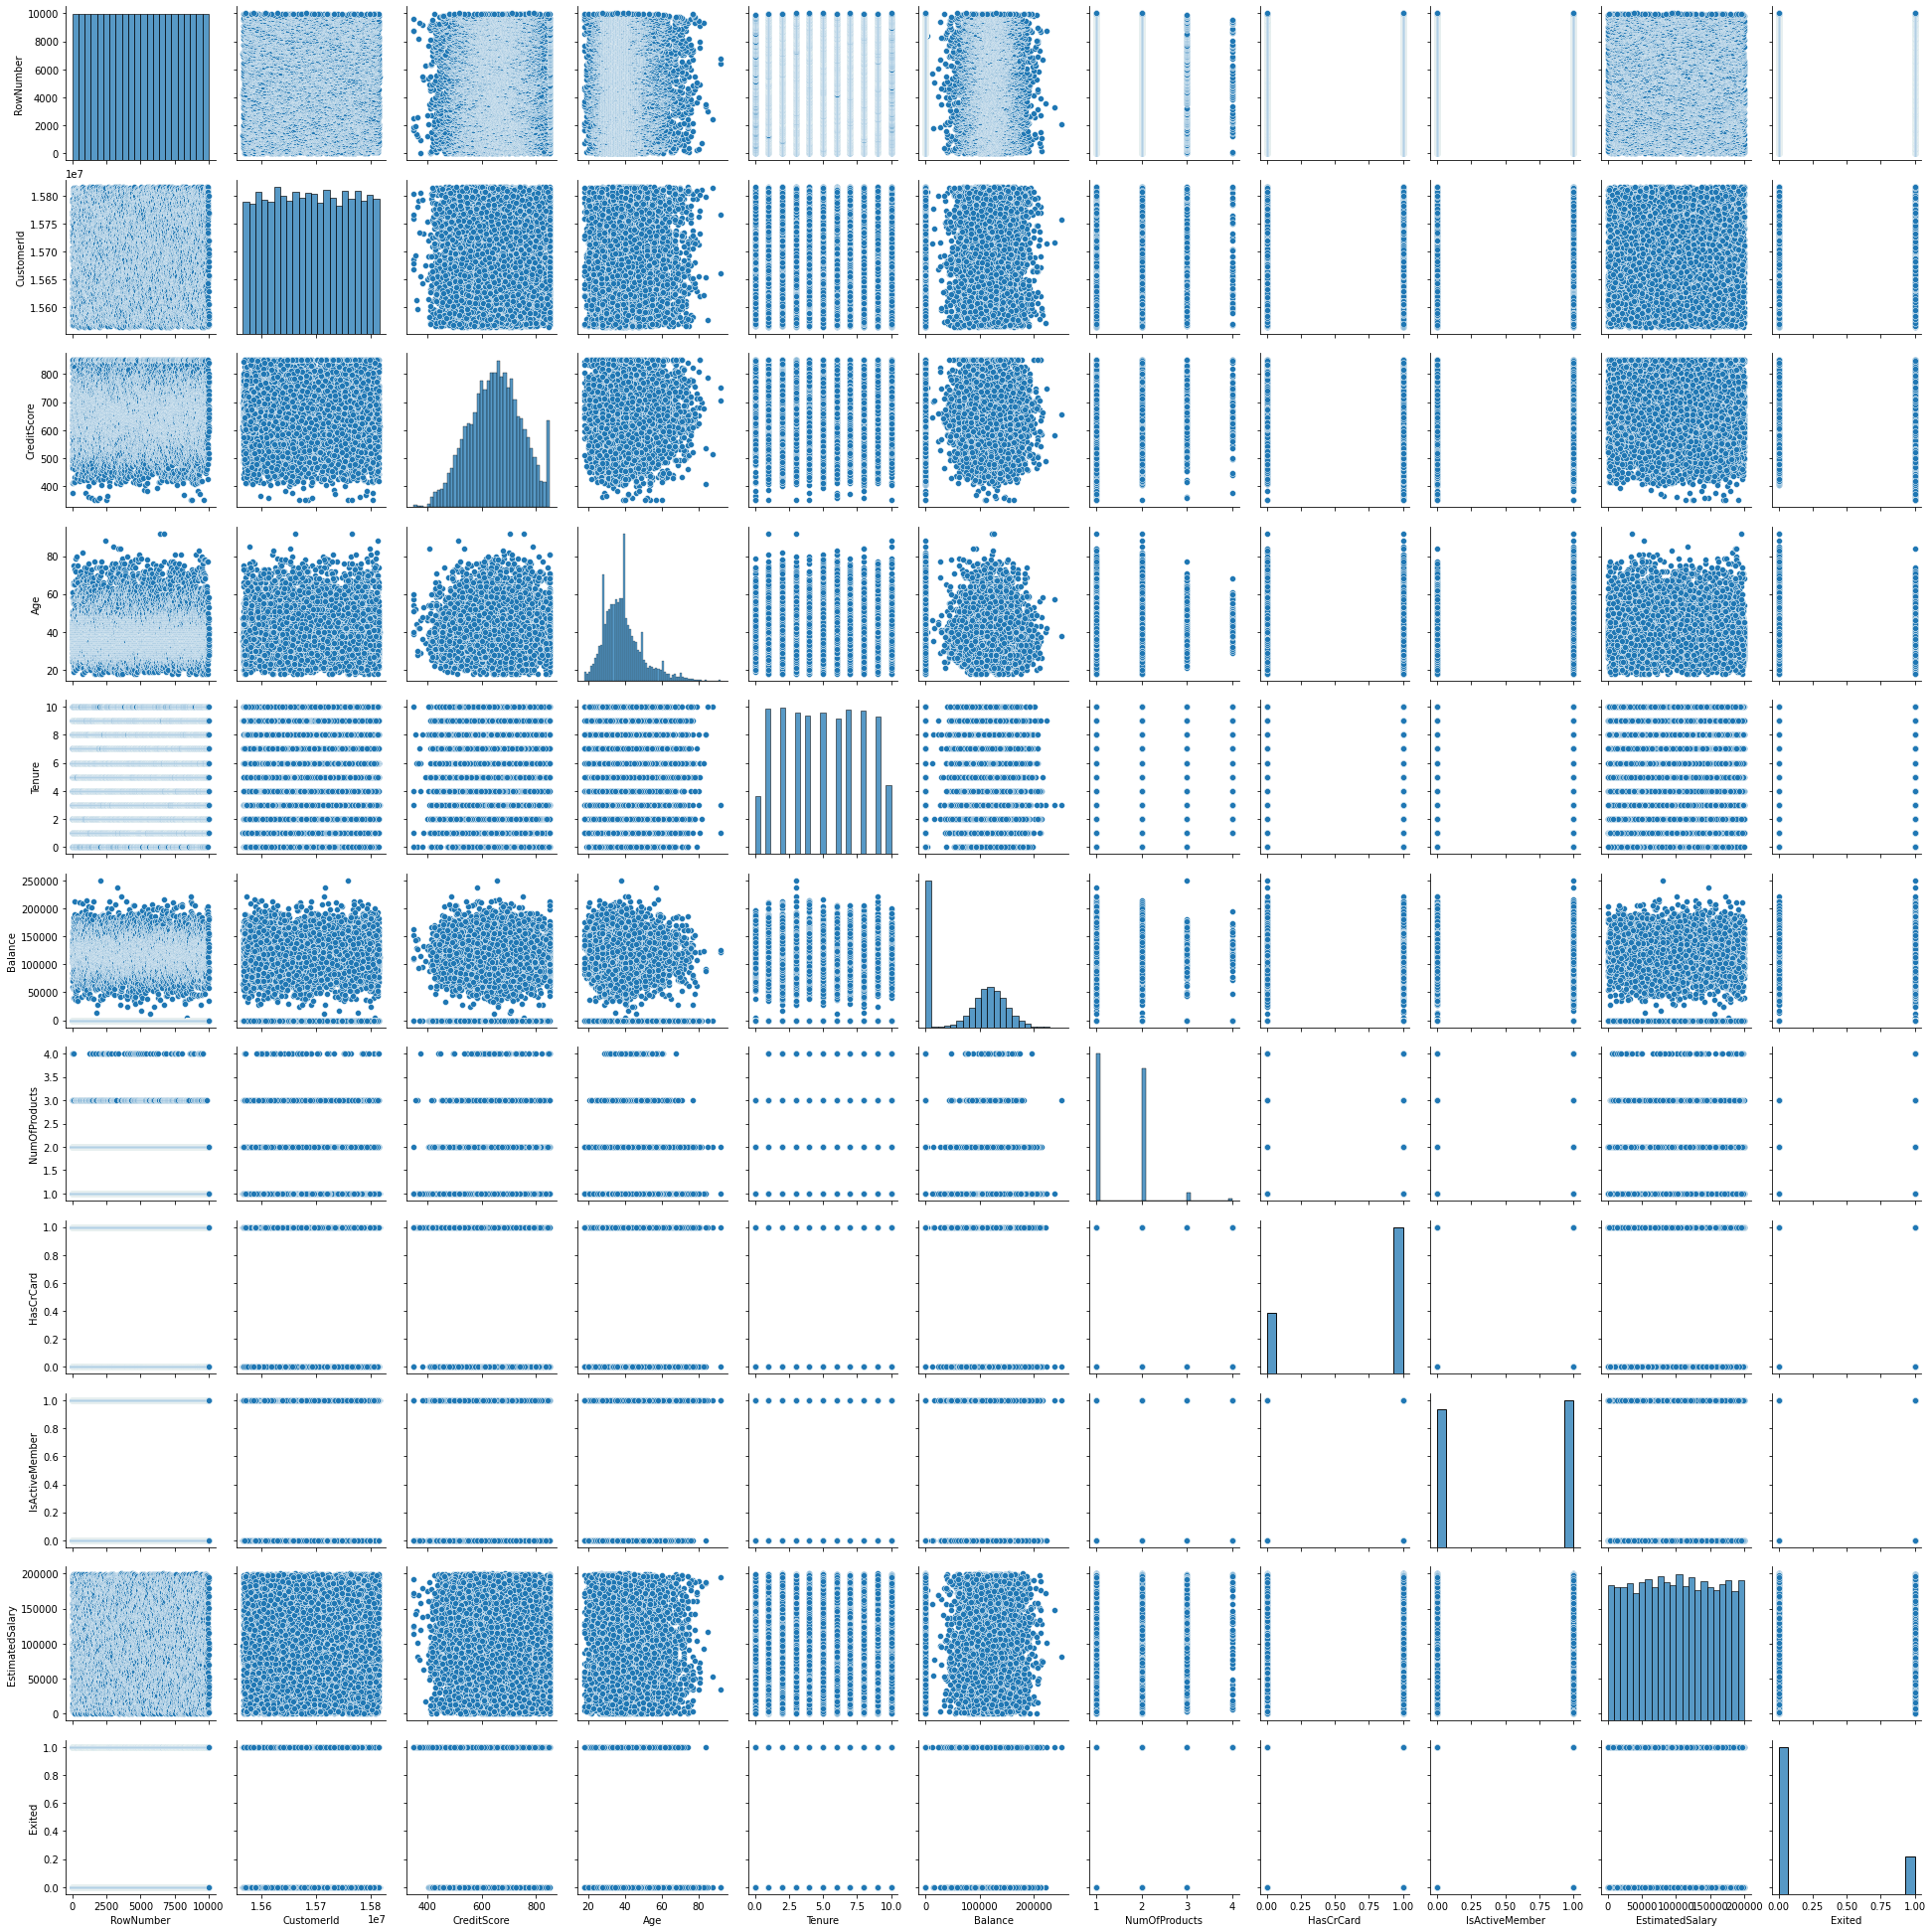

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


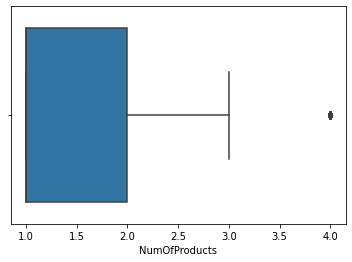

In [ ]:
sns.boxplot(data['NumOfProducts'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


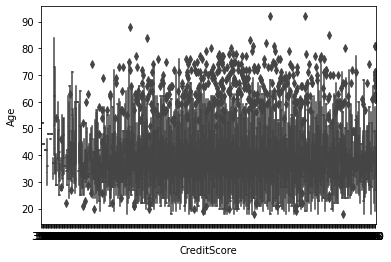

In [ ]:
sns.boxplot(data['CreditScore'], data['Age']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


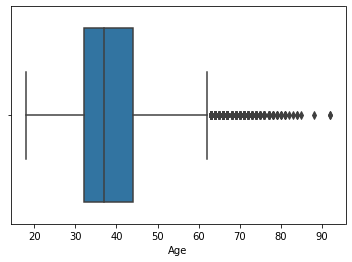

In [ ]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


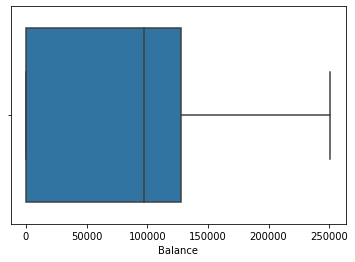

In [ ]:
sns.boxplot(data['Balance'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


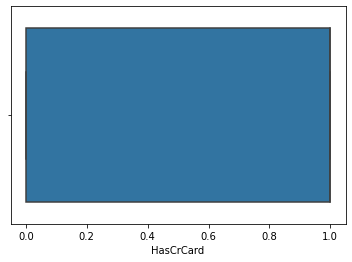

In [ ]:
sns.boxplot(data['HasCrCard'])

# LETS DROP SOME COLUMNS THAT ARE NOT ADDING VALUES TO OUR ANALYSIS 

In [ ]:
data.drop('RowNumber',axis=1,inplace=True)
data.drop('CustomerId',axis=1,inplace=True)
data.drop('Surname',axis=1,inplace=True)

# As all the values are unique in the columns, it doesn't help our model to predict anything.
# lets drop them 

In [ ]:
 # Print 10 samples from the dataset
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


BASIC PROCESSING - ONE-ENCODING AND CONVERSION TO FLOAAT 

In [ ]:
#just some basic preprocessing
data.drop_duplicates()
data = pd.get_dummies(data)
data = data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
data


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#explorinfg column names
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
#getting the features and labels and finally splitting the test and train data.


from sklearn.model_selection import train_test_split
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',  'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]

Y = data['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#let us scale the data as features are on different scales which might be a problem while modelling

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.556     , 0.14864865, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.55200005, 0.14864865, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.52400005, 0.39189193, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64400005, 0.36486486, 0.90000004, ..., 0.        , 1.        ,
        0.        ],
       [0.62600005, 0.28378376, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.826     , 0.32432434, 0.6       , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

LETS CONFIRM THE LATEST VERSION OF TENSORFLOW 

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.3.0


LETS US CONVERT THE DATA ELEMENT INTO TENSOR 

In [ ]:

# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [ ]:
X_train.shape[1]

13

In [ ]:
# Let us try modelling now. We will use a few concepts covered in the practice exercise shared with the course material.

LETS DO MODELLING 

In [ ]:
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  return loss

CALLING THE TRAIN FUNCTION WITH 50 EPOCH 

In [ ]:

for epoch in range(50):
  loss = train(X_train, y_train)
  print('Epoch %d: Loss = %.4f' % (epoch, float(loss)))


print('Final Weights after 50 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 50 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Loss = 0.7972
Epoch 1: Loss = 0.7065
Epoch 2: Loss = 0.6290
Epoch 3: Loss = 0.5627
Epoch 4: Loss = 0.5061
Epoch 5: Loss = 0.4577
Epoch 6: Loss = 0.4163
Epoch 7: Loss = 0.3809
Epoch 8: Loss = 0.3506
Epoch 9: Loss = 0.3248
Epoch 10: Loss = 0.3026
Epoch 11: Loss = 0.2837
Epoch 12: Loss = 0.2676
Epoch 13: Loss = 0.2538
Epoch 14: Loss = 0.2419
Epoch 15: Loss = 0.2318
Epoch 16: Loss = 0.2232
Epoch 17: Loss = 0.2158
Epoch 18: Loss = 0.2094
Epoch 19: Loss = 0.2040
Epoch 20: Loss = 0.1994
Epoch 21: Loss = 0.1954
Epoch 22: Loss = 0.1920
Epoch 23: Loss = 0.1891
Epoch 24: Loss = 0.1866
Epoch 25: Loss = 0.1845
Epoch 26: Loss = 0.1826
Epoch 27: Loss = 0.1810
Epoch 28: Loss = 0.1797
Epoch 29: Loss = 0.1785
Epoch 30: Loss = 0.1775
Epoch 31: Loss = 0.1766
Epoch 32: Loss = 0.1759
Epoch 33: Loss = 0.1753
Epoch 34: Loss = 0.1747
Epoch 35: Loss = 0.1742
Epoch 36: Loss = 0.1738
Epoch 37: Loss = 0.1734
Epoch 38: Loss = 0.1731
Epoch 39: Loss = 0.1728
Epoch 40: Loss = 0.1726
Epoch 41: Loss = 0.1724
Ep

TESTING THE MODEL ON THE TEST DATA / PREDICTING ALSO ON THE  TEST DATA 

In [ ]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(0.17347074, shape=(), dtype=float32)


KERAS MODEL 

Creating a model
Keras model object can be created with Sequential class

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [ ]:
model = Sequential()

model.add(Dense(64, input_shape = (29,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))


sgd = optimizers.Adam(lr = 0.001)


model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])


SUMMARY OF THE MODEL 

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


EVALUATION 


Evaluation
## Keras model can be evaluated with evaluate() function

In [ ]:
X_test = preprocessing.normalize(X_test)

CONFUSION MATRIX 

In [ ]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)